### Name :- ADIKARI A.M.A.D.
### Index No :- 190021A

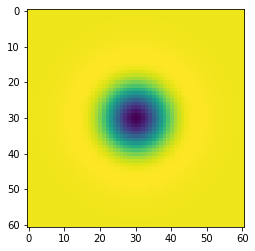

In [2]:
# Question 01
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + (Y**2/(sigma**2)) - 2)*np.exp(-(X**2 + Y**2)/sigma**2)

plt.imshow(log)
plt.show()

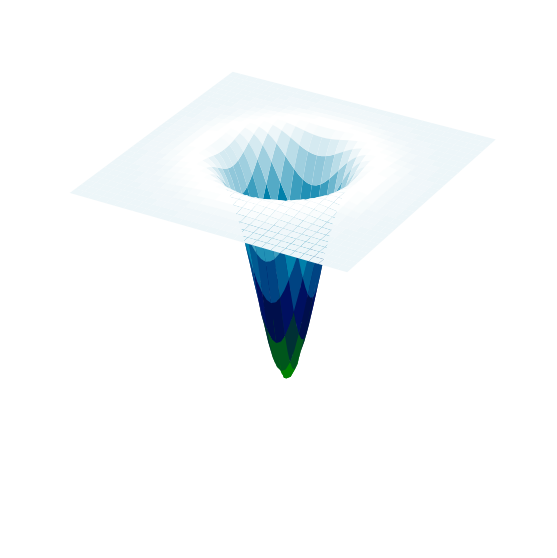

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

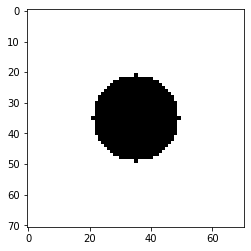

In [4]:
# Question 02
w, h = 71, 71
hw, hh = w//2, h//2

f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh,hh+1,1), np.arange(-hw,hw+1,1))

r = w//5
f *= X**2 + Y**2 > r**2

plt.imshow(f, cmap='gray')
plt.show()

(35, 35, 5)
10


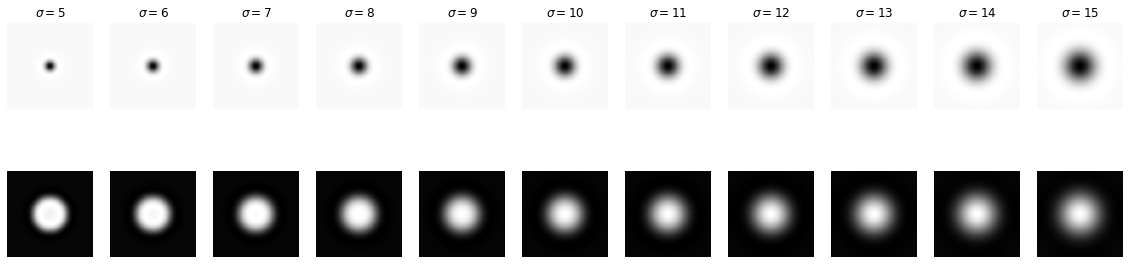

In [5]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20, 5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)

for i, sigma in enumerate (np.arange(5, 16, 1)):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + (Y**2/(sigma**2)) - 2)*np.exp(-(X**2 + Y**2)/sigma**2)
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log, cmap='gray')
    ax[0, i].axis('off')
    ax[0, i].set_title('$\sigma = {}$'.format(sigma))
    ax[1, i].imshow(f_log, cmap='gray')
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])

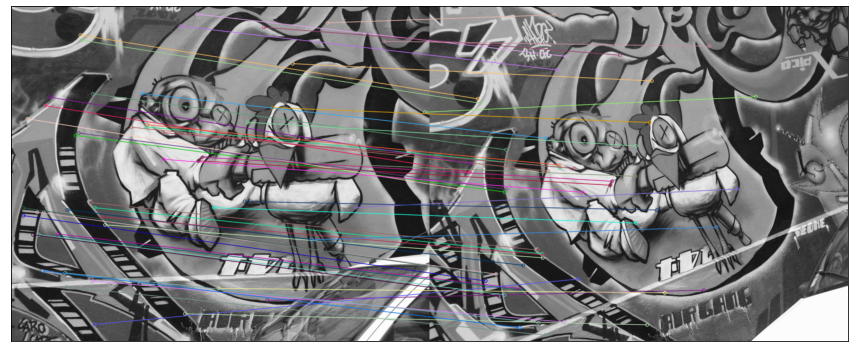

In [6]:
# Question 03
import cv2 as cv
import matplotlib.pyplot as plt

image1 = cv.imread('img1.ppm')  
image2 = cv.imread('img2.ppm') 

image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(image1, keypoints_1, image2, keypoints_2, matches[:50], image2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()

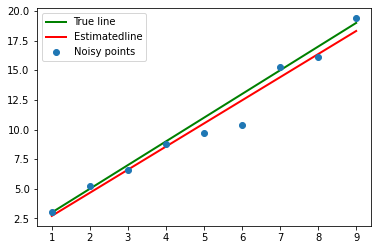

In [7]:
# Question 04
import numpy as np
import matplotlib.pyplot as plt
m = 2
c = 1
x = np.arange(1, 10, 1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape)

y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n, 1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c],color='g',linewidth=2, label='True line' )
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar],color='r',linewidth=2, label='Estimatedline' )
plt.plot(x, y, 'o', label='Noisy points')
plt.legend()

plt.show()

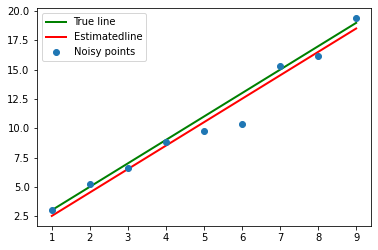

In [8]:
#Question 05
import numpy as np
import matplotlib.pyplot as plt
m = 2
c = 1
x = np.arange(1, 10, 1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape)

y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)

ev_corresping_to_smallest_ev = V[:, np.argmin(W)]

a = ev_corresping_to_smallest_ev[0]
b = ev_corresping_to_smallest_ev[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b
cstar = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c],color='g',linewidth=2, label='True line' )
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar],color='r',linewidth=2, label='Estimatedline' )
plt.plot(x, y, 'o', label='Noisy points')
plt.legend(loc='best')

plt.show()